In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')

In [2]:
df = pd.read_csv('CustomerSurvival.csv', encoding='utf-8')
df.head()

,ID,Plan,extra_time,Extra_Data,Change_Plan,Contract,Locked,Key_Account,Lifetime,Lost_User
0,1,1,792.83,-10.45,0,0,0,0,25,0
1,2,1,121.67,-21.14,0,0,0,0,25,0
2,3,1,-30.00,-25.66,0,0,0,0,2,1
3,4,1,241.50,-288.34,0,1,0,1,25,0
4,5,1,1629.67,-23.66,0,0,0,1,25,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 10 columns):
ID             4975 non-null int64
Plan           4975 non-null int64
extra_time     4975 non-null float64
Extra_Data     4975 non-null float64
Change_Plan    4975 non-null int64
Contract       4975 non-null int64
Locked         4975 non-null int64
Key_Account    4975 non-null int64
Lifetime       4975 non-null int64
Lost_User      4975 non-null int64
dtypes: float64(2), int64(8)
memory usage: 388.8 KB


In [28]:
df_num = df[['extra_time', 'Extra_Data']]

In [29]:
df.describe()

,ID,Plan,extra_time,Extra_Data,Change_Plan,Contract,Locked,Key_Account,Lifetime,Lost_User
count,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000
mean,2488.000000,1.057688,258.520034,-71.580422,0.021307,0.245226,0.047437,0.227337,14.774271,0.782714
std,1436.303125,0.258527,723.057213,275.557448,0.144419,0.430264,0.278143,0.419154,6.534273,0.412441
min,1.000000,1.000000,-2828.330000,-2189.880000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1244.500000,1.000000,-126.670000,-74.290000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000
50%,2488.000000,1.000000,13.500000,-59.650000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000
75%,3731.500000,1.000000,338.660000,-25.795000,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000
max,4975.000000,3.000000,4314.000000,2568.700000,1.000000,1.000000,2.000000,1.000000,25.000000,1.000000


In [30]:
df_num.describe()

,extra_time,Extra_Data
count,4975.000000,4975.000000
mean,258.520034,-71.580422
std,723.057213,275.557448
min,-2828.330000,-2189.880000
25%,-126.670000,-74.290000
50%,13.500000,-59.650000
75%,338.660000,-25.795000
max,4314.000000,2568.700000


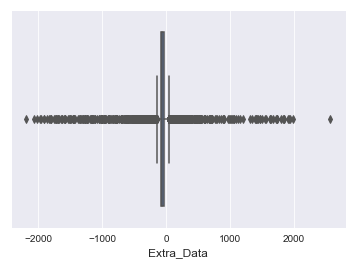

In [10]:
sns.boxplot(x=df_num['Extra_Data'])

In [11]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_num))
print(z)

[[0.73903374 0.22186505 1.56509476]
 [0.18928487 0.18306706 1.56509476]
 [0.39906805 0.1666623  1.95516093]
 ...
 [0.13235419 0.51882028 1.56509476]
 [0.13783139 0.35531706 0.95287638]
 [1.26446692 0.09022466 1.56509476]]


In [24]:
threshold = 3
print(np.where(z>threshold))

(array([  22,   31,   39,   41,   58,   67,   99,  139,  150,  155,  161,
        176,  182,  209,  221,  259,  279,  283,  287,  299,  346,  361,
        368,  376,  399,  471,  487,  496,  499,  572,  579,  588,  609,
        610,  610,  643,  701,  709,  715,  737,  743,  748,  780,  792,
        793,  796,  804,  818,  836,  847,  933,  954,  957,  980,  980,
        983,  992,  999, 1017, 1034, 1087, 1153, 1174, 1182, 1201, 1229,
       1230, 1238, 1240, 1251, 1267, 1273, 1277, 1297, 1305, 1326, 1361,
       1383, 1384, 1390, 1402, 1422, 1434, 1436, 1469, 1489, 1494, 1598,
       1620, 1637, 1710, 1715, 1743, 1749, 1762, 1765, 1813, 1825, 1841,
       1852, 1859, 1870, 1926, 1934, 1955, 1971, 2007, 2025, 2038, 2117,
       2169, 2172, 2204, 2213, 2217, 2223, 2225, 2236, 2255, 2269, 2284,
       2293, 2295, 2329, 2336, 2357, 2359, 2378, 2381, 2389, 2407, 2412,
       2423, 2435, 2437, 2439, 2447, 2498, 2511, 2591, 2599, 2601, 2617,
       2654, 2656, 2658, 2677, 2678, 2745, 2749, 2

In [21]:
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
IQR = q3-q1
print(IQR)

extra_time    465.330
Extra_Data     48.495
Lifetime        6.000
dtype: float64


In [37]:
time_q1 = df_num.extra_time.quantile(0.25)
time_q3 = df_num.extra_time.quantile(0.75)
time_IQR = time_q3 - time_q1
time_box_u = time_q3 + 1.5 * time_IQR
time_box_l = time_q1 - 1.5 * time_IQR
print(time_IQR, time_box_u, time_box_l)

465.33 1036.655 -824.665


In [40]:
data_q1 = df_num.Extra_Data.quantile(0.25)
data_q3 = df_num.Extra_Data.quantile(0.75)
data_IQR = data_q3 - data_q1
data_box_u = data_q3 + 1.5 * data_IQR
data_box_l = data_q1 - 1.5 * data_IQR
print(data_q1, data_q3, data_IQR, data_box_u, data_box_l)

-74.28999999999999 -25.795 48.49499999999999 46.94749999999998 -147.03249999999997


In [50]:
df_num_std = df_num.loc[( 
                          ((df_num.extra_time > time_box_l) & (df_num.extra_time < time_box_u)) 
                         & ((df_num.Extra_Data > data_box_l) & (df_num.Extra_Data < data_box_u))
)                        
                        ,['extra_time', "Extra_Data"]]
print(df_num_std)

      extra_time  Extra_Data
0         792.83      -10.45
1         121.67      -21.14
2         -30.00      -25.66
5         182.00     -115.86
9         289.00     -131.78
11         90.00      -27.69
13        157.83       45.26
17        644.17      -73.36
18        -95.00        9.48
21        597.50        9.90
23         36.50      -81.63
24        -77.17      -60.14
26       -113.50      -59.96
27         19.00     -101.87
28        260.33       43.01
30        -95.33      -60.00
32        545.33      -43.32
34        581.00       24.36
35         74.33      -96.34
40        101.17      -14.58
43       -154.50      -55.08
45       -179.33      -59.89
47        124.67     -101.62
48       -101.33      -59.82
49       -167.83      -55.08
50         96.17      -56.35
51        249.83        5.31
52        441.17      -24.31
54        -50.00      -59.92
55         77.47      -48.80
...          ...         ...
4935     -183.00      -35.10
4937     -124.00      -59.72
4939     -225.

In [56]:
df_std_time = df_num.loc[((df_num.extra_time > time_box_l) & (df_num.extra_time < time_box_u)) , ['extra_time']]
print(df_std_time.describe(),
df_num.describe())

        extra_time
count  4479.000000
mean     65.548462
std     305.505281
min    -793.670000
25%    -140.000000
50%     -15.330000
75%     197.165000
max    1035.030000         extra_time   Extra_Data
count  4975.000000  4975.000000
mean    258.520034   -71.580422
std     723.057213   275.557448
min   -2828.330000 -2189.880000
25%    -126.670000   -74.290000
50%      13.500000   -59.650000
75%     338.660000   -25.795000
max    4314.000000  2568.700000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1159a8f98>]],
      dtype=object)

<Figure size 720x360 with 0 Axes>

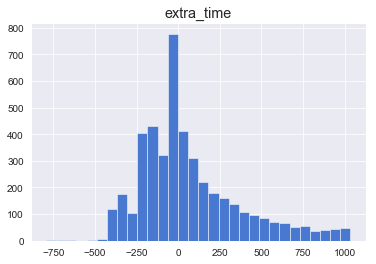

In [58]:
plt.figure(figsize = (10,5))
df_std_time.hist(bins=30)

In [61]:
df_std_data = df_num.loc[((df_num.Extra_Data > data_box_l) & (df_num.Extra_Data < data_box_u)) , ['Extra_Data']]
print(df_std_data.describe(),df_num.describe())

        Extra_Data
count  3473.000000
mean    -49.521293
std      31.859325
min    -146.760000
25%     -59.990000
50%     -59.360000
75%     -37.480000
max      46.890000         extra_time   Extra_Data
count  4975.000000  4975.000000
mean    258.520034   -71.580422
std     723.057213   275.557448
min   -2828.330000 -2189.880000
25%    -126.670000   -74.290000
50%      13.500000   -59.650000
75%     338.660000   -25.795000
max    4314.000000  2568.700000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1160b1dd8>]],
      dtype=object)

<Figure size 720x360 with 0 Axes>

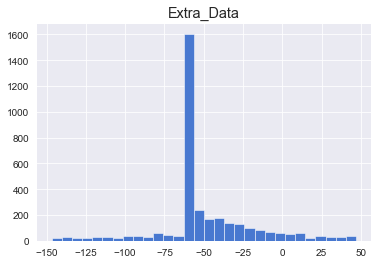

In [65]:
plt.figure(figsize = (10,5))
df_std_data.hist(bins=30)

### Distribution of Variables

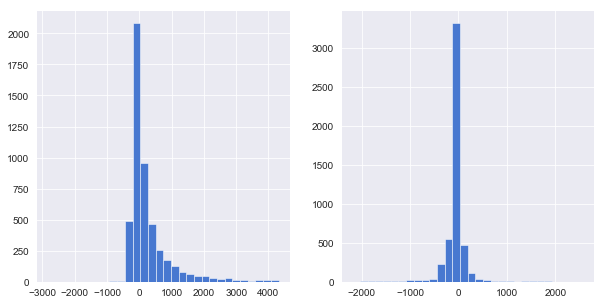

In [63]:
plt.figure(figsize = (10,5))
plt.subplot(121)
df.extra_time.hist(bins=30)
plt.subplot(122)
df.Extra_Data.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1168534e0>]],
      dtype=object)

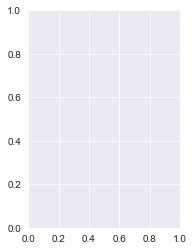

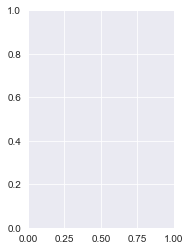

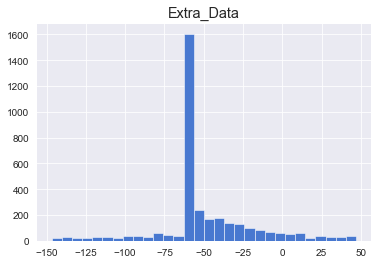

In [68]:
plt.figure()
plt.subplot(1,2,1)
df_std_time.hist(bins=30)
plt.subplot(1,2,2)
df_std_data.hist(bins=30)

extra_time is 右偏，extra_data is normal distribution

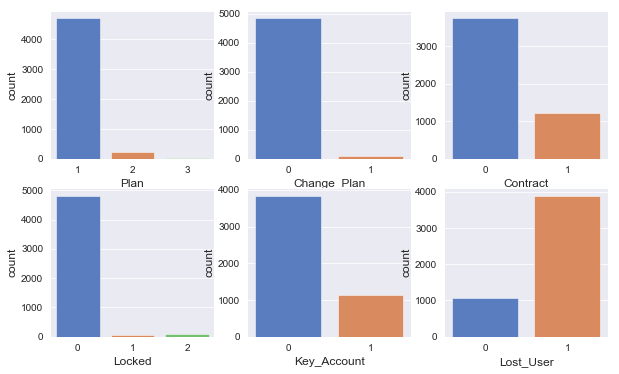

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
sns.countplot(x='Plan', data=df, ax=axes[0,0])
sns.countplot(x='Change_Plan', data=df, ax=axes[0,1])
sns.countplot(x='Contract', data=df, ax=axes[0,2])
sns.countplot(x='Locked', data=df, ax=axes[1,0])
sns.countplot(x='Key_Account', data=df, ax=axes[1,1])
sns.countplot(x='Lost_User', data=df, ax=axes[1,2])

Plan,Change_Plan,Locked的类型分布不均衡，例如Locked，办理过套餐外业务的用户数量极少，导致样本缺乏足够的代表性，可能会对模型的结果产生一定影响

### 自变量与因变量之间的关系

<Figure size 720x432 with 0 Axes>

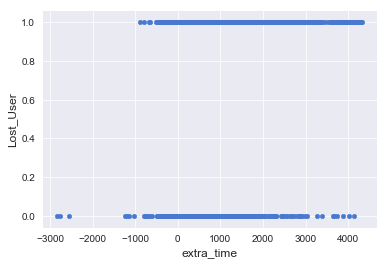

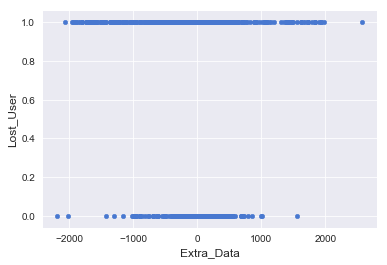

In [67]:
plt.figure(figsize=(10,6))
df.plot.scatter(x='extra_time', y='Lost_User')
df.plot.scatter(x='Extra_Data', y='Lost_User')

In [64]:
bin1 = [-3000, -2000, -500, 0, 500, 2000, 3000, 5000]
df['time_label'] = pd.cut(df.extra_time, bins=bin1)
bin2 = [-3000, -2000, -500, 0, 500, 2000, 3000]
df['data_label'] = pd.cut(df.Extra_Data, bins=bin2)

# To inspect distribution
time_amount = df.groupby('time_label').ID.count().sort_values().reset_index()
time_amount['amount_cumsum'] = time_amount.ID.cumsum()
time_amount['prop'] = time_amount.apply(lambda x:x.amount_cumsum/4975, axis=1)
data_amount = df.groupby('data_label').ID.count().sort_values().reset_index()
data_amount['amount_cumsum'] = time_amount.ID.cumsum()
data_amount['prop'] = time_amount.apply(lambda x:x.amount_cumsum/4975, axis=1)

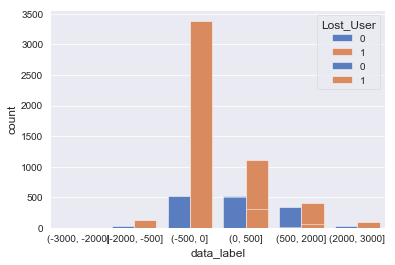

In [66]:
sns.countplot(x='time_label', hue='Lost_User', data=df)
sns.countplot(x='data_label', hue='Lost_User', data=df)

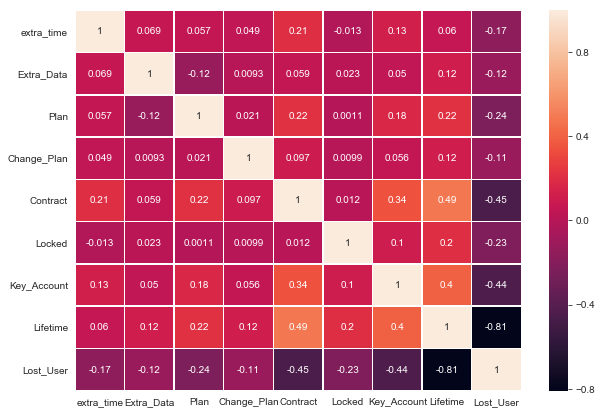

In [37]:
internal_chars = ['extra_time', 'Extra_Data', 'Plan', 'Change_Plan', 'Contract', 'Locked', 'Key_Account', 'Lifetime', 'Lost_User']
corrmat = df[internal_chars].corr()
f, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation='0')
sns.heatmap(corrmat, square=False, linewidths=.5, annot=True)

In [69]:
df['time_tranf'] = df.apply(lambda x:1 if x.extra_time>0 else 0, axis=1)
df['data_tranf'] = df.apply(lambda x:1 if x.extra_time>0 else 0, axis=1)
df.head()

,ID,Plan,extra_time,Extra_Data,Change_Plan,Contract,Locked,Key_Account,Lifetime,Lost_User,time_tranf,data_tranf
0,1,1,792.83,-10.45,0,0,0,0,25,0,1,1
1,2,1,121.67,-21.14,0,0,0,0,25,0,1,1
2,3,1,-30.00,-25.66,0,0,0,0,2,1,0,0
3,4,1,241.50,-288.34,0,1,0,1,25,0,1,1
4,5,1,1629.67,-23.66,0,0,0,1,25,0,1,1


In [70]:
x = df.loc[:, ['Plan', 'time_tranf', 'data_tranf',  'Change_Plan', 'Contract', 'Locked', 'Key_Account']]
x = np.array(x)
x

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [3, 0, 0, ..., 1, 0, 1]])

In [71]:
y = df.Lost_User
y = y[:, np.newaxis]
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [81]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best',
                                 max_depth=3, min_samples_split=10,
                                 min_samples_leaf=5)
clf = clf.fit(x_train, y_train)

In [82]:
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)
'train_score:{0},test_score:{1}'.format(train_score, test_score)

'train_score:0.8644457208500862,test_score:0.8519758874748827'

In [100]:
def cv_score(d):
    clf_opt = tree.DecisionTreeClassifier(max_depth=d).fit(x_train, y_train)
    
    tr_opt_score = clf_opt.score(x_train, y_train)
    cv_score = clf_opt.score(x_test, y_test)
    
    return (tr_opt_score, cv_score)

depths = range(2, 10)
scores = [cv_score(d) for d in depths]
train_opt_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

score_index = np.argmax(cv_scores)
test_score = cv_scores[score_index]
best_para = depths[score_index]
print('best_param:{0}, test_score:{1}'.format(best_para, test_score))

best_param:3, test_score:0.8519758874748827


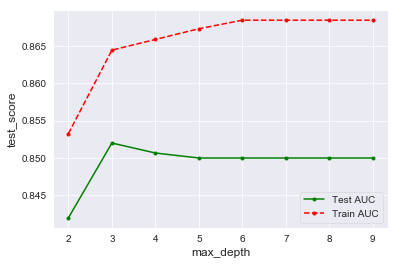

In [101]:
plt.figure()
plt.grid(True)
plt.xlabel('max_depth')
plt.ylabel('test_score')
plt.plot(depths, cv_scores, '.g-', label='Test AUC')
plt.plot(depths, train_opt_scores, '.r--', label='Train AUC')
plt.legend()

In [103]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.51      0.61       332
           1       0.87      0.95      0.91      1161

   micro avg       0.85      0.85      0.85      1493
   macro avg       0.81      0.73      0.76      1493
weighted avg       0.84      0.85      0.84      1493



In [105]:
from sklearn import svm, datasets  
from sklearn.metrics import roc_curve, auc  # 计算roc和auc  
from sklearn import cross_validation

random_state = np.random.RandomState(0)  
n_samples, n_features = x.shape  
X = np.c_[x, random_state.randn(n_samples, 200 * n_features)]  
X_train, X_test, y_train2, y_test2 = cross_validation.train_test_split(X, y, test_size=.2,random_state=0)  
svm = svm.SVC(kernel='linear', probability=True,random_state=random_state) 
y_score = svm.fit(X_train, y_train2).decision_function(X_test)  
fpr,tpr,threshold = roc_curve(y_test, y_score) # 计算真正率和假正率  
roc_auc = auc(fpr,tpr) # 计算auc的值  

plt.figure()  
lw = 2  
plt.figure(figsize=(6,6))  
plt.plot(fpr, tpr, color='darkorange',  
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic example')  
plt.legend(loc="lower right")  
plt.show()  

ImportError: cannot import name 'cross_validation' from 'sklearn' (/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/__init__.py)

In [59]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()      #通过数据集导入iris数据
X, y = iris.data[:, :2], iris.target      #将iris数据的自变量和结果标签分别赋予向量X和y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)      #切分数据集分别为训练集和测试集
scaler = preprocessing.StandardScaler().fit(X_train)    #数据预处理，即数据标准化
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)    #导入k近邻算法
knn.fit(X_train, y_train)      #模拟数据模型
y_pred = knn.predict(X_test)    #预测结果
accuracy_score(y_test, y_pred)    #测试预测结果的准确率

0.631578947368421